In [1]:
from pandas import CategoricalDtype, read_csv
import pandas as pd

# -------------------------
# 1. 설정 정의
# -------------------------

# CSV key 목록
RE_KEYS = ('DE', 'DR', 'V')

# 기본 숫자 변환기
parse_int = lambda x: int(x) if x else 0
parse_int_comma = lambda x: int(x.replace(',', '')) if x else 0

# CSV 컬럼별 변환 함수
CONVERTERS = {
    'T': lambda x: int(x) if x else 1,
    'R': lambda x: x if x else 'A',
    'E': parse_int,
    'A': parse_int,
    'DE': parse_int,
    'DA': parse_int_comma,
    'H': parse_int_comma,
    'M': parse_int_comma,
}

# 컬럼별 dtype
DTYPES = {
    'T': CategoricalDtype((1, 2)),
    'R': CategoricalDtype(('A', 'T', 'D', 'S')),
    'E': 'uint8',
    'A': 'uint8',
    'DE': 'uint8',
    'DA': 'uint16',
    'H': 'uint16',
    'M': 'uint16'
}


# -------------------------
# 2. CSV 데이터 읽기 & 병합
# -------------------------

def load_re_data():
    df_list = []
    for key in RE_KEYS:
        df = read_csv(f'R/{key}.csv', index_col=0, converters=CONVERTERS)
        df = df.astype(DTYPES, copy=False)
        df_list.append(df)
    return pd.concat(df_list, keys=RE_KEYS, names=('RE',))


df = load_re_data()
df

T  R   E  A  DE    DA     H     M
RE I                                     
DE 1    1  T   0  0   8  2947  1425  4611
   1    1  D   1  0   3  1818     0   650
   1    1  D   2  0   7  4735   487   308
   1    1  S   1  0   3  2078  2748     0
   1    1  S   1  1   3   269  5848   189
...    .. ..  .. ..  ..   ...   ...   ...
V  467  2  T   7  2   4  6453     0  9665
   467  2  D  10  0   5  6272    62  1417
   467  2  D   6  1   7  5267    78    76
   467  2  S   5  1   6  4602  8211   716
   467  2  S   2  5   7  1979  7396   329

[9110 rows x 8 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   T       9110 non-null   category
 1   R       9110 non-null   category
 2   E       9110 non-null   uint8   
 3   A       9110 non-null   uint8   
 4   DE      9110 non-null   uint8   
 5   DA      9110 non-null   uint16  
 6   H       9110 non-null   uint16  
 7   M       9110 non-null   uint16  
dtypes: category(2), uint16(3), uint8(3)
memory usage: 144.9+ KB


In [3]:
from numpy import float32

values = df.iloc[:, 2:].to_numpy()
max_vals = values.max(axis=0)
normalized = (values / max_vals).astype(float32, copy=False)
normalized

array([[0.        , 0.        , 0.3478261 , 0.0984894 , 0.05393845,
        0.13442756],
       [0.01754386, 0.        , 0.13043478, 0.06075797, 0.        ,
        0.01894988],
       [0.03508772, 0.        , 0.3043478 , 0.15824477, 0.0184337 ,
        0.00897933],
       ...,
       [0.10526316, 0.01612903, 0.3043478 , 0.17602433, 0.00295242,
        0.00221568],
       [0.0877193 , 0.01612903, 0.26086956, 0.15379988, 0.31079903,
        0.02087403],
       [0.03508772, 0.08064516, 0.3043478 , 0.06613863, 0.27995002,
        0.00959156]], dtype=float32)

In [4]:
# 전체 컬럼(열) 개수 구하기
num_cols = normalized.shape[1]

# Reshape 과정:
# - normalized 배열을 10행씩 묶어서 하나의 긴 행으로 재구성
#   → reshape(-1, num_cols * 10)은 총 행 수를 10개 단위로 묶어 새로운 행으로 만든다는 의미
# - 이후 .T로 전치(transpose)하여 행/열을 뒤집음
# - 마지막으로 tuple(...)로 변환해 튜플 형태로 저장
reshaped_tuple = tuple(
    normalized.reshape(-1, num_cols * 10).T
)
len(reshaped_tuple)

60

2025-11-24 06:03:01.031656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763964181.045873    1690 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763964181.050266    1690 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763964181.064021    1690 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763964181.064038    1690 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763964181.064039    1690 computation_placer.cc:177] computation placer alr

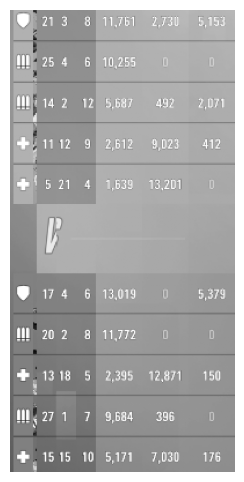

[[   21     3     8 11761  2730  5153]
 [   25     4     6 10255     0     0]
 [   14     2    12  5687   492  2071]
 [   11    12     9  2612  9023   412]
 [    5    21     4  1639 13201     0]
 [   17     4     6 13019     0  5379]
 [   20     2     8 11772     0     0]
 [   13    18     5  2395 12871   150]
 [   27     1     7  9684   396     0]
 [   15    15    10  5171  7030   176]]


2025-11-24 06:03:07.433927: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
from pathlib import Path
import tensorflow as tf
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
from matplotlib.pyplot import figure, axis, imshow, show
from numpy import array, uint16


# ==========================
# 이미지 전처리 함수
# ==========================

def preprocess_image(path, label):
    """PNG 이미지 파일을 읽고 필요한 부분을 추출 및 리사이즈."""
    image = decode_png(read_file(path), channels=1)[230:930, 530:1370]
    # 필요한 HUD 영역만 선택
    hud_parts = [
        image[:, :40], image[:, 390:420], image[:, 450:480],
        image[:, 500:530], image[:, 570:640], image[:, 670:740], image[:, 770:]
    ]
    cropped = tf.concat(hud_parts, axis=1)
    resized = resize(cropped, (400, 194)) / 255
    return resized, label


# ==========================
# Dataset 생성
# ==========================

image_paths = sorted(map(str, Path().rglob('*.png')))
data_count = len(reshaped_tuple)

dataset = (
    Dataset.from_tensor_slices((image_paths, reshaped_tuple))
    .map(preprocess_image, num_parallel_calls=AUTOTUNE)
    .shuffle(data_count)
)

train_size = int(data_count * 0.9)
train_ds = dataset.take(train_size).batch(32).prefetch(AUTOTUNE)
val_ds = dataset.skip(train_size).batch(32).prefetch(AUTOTUNE)

# ==========================
# 샘플 시각화
# ==========================

for x_batch, y_batch in train_ds.take(1):
    figure(figsize=(6, 6))
    axis('off')
    imshow(x_batch[0], 'gray')
    show()
    print((array(y_batch).T[0].reshape(-1, num_cols) * max_vals).round().astype(uint16))

In [6]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import Huber

clear_session()

input_tensor = Input(shape=x_batch.shape[1:])  # (400, 194, 1)

x = Conv2D(32, (3, 3), padding='same', use_bias=False)(input_tensor)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D()(x)

x = Conv2D(64, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D()(x)

x = Conv2D(128, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D()(x)

x = Flatten()(x)

x = Dense(256, use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

numeric_cols = df.columns.to_list()[2:]
outputs = []
for i in range(10):
    for col in numeric_cols:
        h = Dense(128, use_bias=False)(x)
        h = BatchNormalization()(h)
        h = ReLU()(h)
        outputs.append(Dense(1, name=f'{col}_{i}')(h))  # (60, 1)
model = Model(inputs=input_tensor, outputs=outputs)

loss = {}
for i in range(10):
    for col in numeric_cols:
        loss[f'{col}_{i}'] = Huber()

metrics = {}
for i in range(10):
    for col in numeric_cols:
        metrics[f'{col}_{i}'] = 'mean_absolute_error'
model.compile('adamw', loss, metrics=metrics)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 194,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 400, 194,  │        288 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 400, 194,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 400, 194,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 200, 97,   │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 200, 97,   │     18,432 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 97,   │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 200, 97,   │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 100, 48,   │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 100, 48,   │     73,728 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 48,   │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 100, 48,   │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 50, 24,    │          0 │ re_lu_2[0][0]     │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 153600)    │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │ 39,321,600 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,768 │ re_lu_3[0][0]   

 Total params: 41,420,508 (158.01 MB)

 Trainable params: 41,404,188 (157.94 MB)

 Non-trainable params: 16,320 (63.75 KB)

In [8]:
from tensorflow.keras.callbacks import Callback, EarlyStopping


class MetricSummaryCallback(Callback):
    def __init__(self, metric_groups=numeric_cols):
        super().__init__()
        self.metric_groups = metric_groups

    def on_train_begin(self, logs=None):
        self.total_epochs = self.params.get('epochs', None)

    def on_epoch_end(self, epoch, logs=None):
        epoch_num = epoch + 1
        total_epochs = self.total_epochs or '?'
        print(f'{epoch_num}/{total_epochs}')

        for group in self.metric_groups:
            train_logs = {
                key: value for key, value in logs.items()
                if key.startswith(group)
            }

            train_loss_values = [
                v for k, v in train_logs.items() if k.endswith('_loss')
            ]
            train_avg_loss = sum(train_loss_values) / len(train_loss_values) if train_loss_values else None
            
            train_metric_values = [
                v for k, v in train_logs.items() if k.endswith('_mean_absolute_error')
            ]
            train_avg_metric = sum(train_metric_values) / len(train_metric_values) if train_metric_values else None

            val_logs = {
                key: value for key, value in logs.items()
                if key.startswith(f'val_{group}')
            }

            val_loss_values = [
                v for k, v in val_logs.items() if k.endswith('_loss')
            ]
            val_avg_loss = sum(val_loss_values) / len(val_loss_values) if val_loss_values else None
            
            val_metric_values = [
                v for k, v in val_logs.items() if k.endswith('_mean_absolute_error')
            ]
            val_avg_metric = sum(val_metric_values) / len(val_metric_values) if val_metric_values else None

            print(
                f'- {group} '
                f'- loss: {train_avg_loss:.4f}'
                f'- mean_absolute_error: {train_avg_metric:.4f} '
                f'- val_loss: {val_avg_loss:.4f}'
                f'- val_mean_absolute_error: {val_avg_metric:.4f} '
            )


# EarlyStopping 콜백 설정
early_stop = EarlyStopping(patience=8, verbose=1, restore_best_weights=True)

# 학습
history = model.fit(
    train_ds,
    epochs=256,
    verbose=0,
    callbacks=(MetricSummaryCallback(), early_stop),
    validation_data=val_ds
)

1/256
- E - loss: 0.2287- mean_absolute_error: 0.5436 - val_loss: 0.0454- val_mean_absolute_error: 0.2467 
- A - loss: 0.1180- mean_absolute_error: 0.3873 - val_loss: 0.0122- val_mean_absolute_error: 0.1177 
- DE - loss: 0.1516- mean_absolute_error: 0.4263 - val_loss: 0.0523- val_mean_absolute_error: 0.2706 
- DA - loss: 0.1176- mean_absolute_error: 0.3708 - val_loss: 0.0364- val_mean_absolute_error: 0.2262 
- H - loss: 0.1431- mean_absolute_error: 0.4127 - val_loss: 0.0316- val_mean_absolute_error: 0.1831 
- M - loss: 0.1583- mean_absolute_error: 0.4455 - val_loss: 0.0198- val_mean_absolute_error: 0.1493 
2/256
- E - loss: 0.1782- mean_absolute_error: 0.4684 - val_loss: 0.0441- val_mean_absolute_error: 0.2405 
- A - loss: 0.0924- mean_absolute_error: 0.3350 - val_loss: 0.0107- val_mean_absolute_error: 0.1067 
- DE - loss: 0.1123- mean_absolute_error: 0.3774 - val_loss: 0.0523- val_mean_absolute_error: 0.2687 
- DA - loss: 0.1085- mean_absolute_error: 0.3590 - val_loss: 0.0387- val_mea

- E - loss: 0.2287- mean_absolute_error: 0.5436 - val_loss: 0.0454- val_mean_absolute_error: 0.2467 
- A - loss: 0.1180- mean_absolute_error: 0.3873 - val_loss: 0.0122- val_mean_absolute_error: 0.1177 
- DE - loss: 0.1516- mean_absolute_error: 0.4263 - val_loss: 0.0523- val_mean_absolute_error: 0.2706 
- DA - loss: 0.1176- mean_absolute_error: 0.3708 - val_loss: 0.0364- val_mean_absolute_error: 0.2262 
- H - loss: 0.1431- mean_absolute_error: 0.4127 - val_loss: 0.0316- val_mean_absolute_error: 0.1831 
- M - loss: 0.1583- mean_absolute_error: 0.4455 - val_loss: 0.0198- val_mean_absolute_error: 0.1493

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


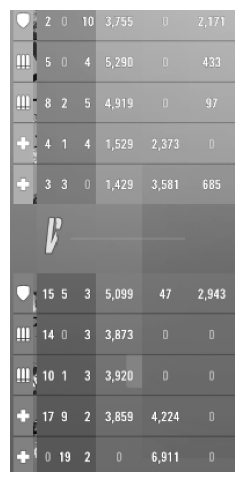

[[   2    0   10 3755    0 2171]
 [   5    0    4 5290    0  433]
 [   8    2    5 4919    0   97]
 [   4    1    4 1529 2373    0]
 [   3    3    0 1429 3581  685]
 [  15    5    3 5099   47 2943]
 [  14    0    3 3873    0    0]
 [  10    1    3 3920    0    0]
 [  17    9    2 3859 4224    0]
 [   0   19    2    0 6911    0]]


2025-11-24 06:14:52.212055: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
for x_batch, y_batch in val_ds.take(1):
    x_sample = x_batch[0:1]
    y_sample = (array(y_batch).T[0].reshape(-1, num_cols) * max_vals).round().astype(uint16)
    y_pred = model.predict(x_sample)
    figure(figsize=(6, 6))
    axis('off')
    imshow(x_batch[0], 'gray')
    show()
    print(y_sample)

In [10]:
(array(y_pred).squeeze().reshape(-1, num_cols) * max_vals).round().astype('int32')

array([[    -4,      8,      0,   1049,   1698,    151],
       [     0,      2,      4,   1825,   1719,  -2224],
       [     5,      3,      6,  -4085,   1862,  -1040],
       [    -4,      8,     -2,  -4282,   3111,   -571],
       [     8,     28,     -7,    608,  -4393,  -7451],
       [    -1,      9,      0,   4243,   8657,   4322],
       [    -5,     18,      1,   3372,   4123,   5762],
       [     6,     -2,      2,   2629,   1130,  -2076],
       [     0,      4,      3,  -1198,   1011,  -3745],
       [    10,     18,     -2,   8081,   3485, -11620]], dtype=int32)